In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
import itertools

import numpy as np
from scipy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

from gmm_lbd import *
%matplotlib inline


In [ ]:
# OLD TESTS

array([[  4.50611115e-05,   5.72000000e+00],
       [  4.81605530e-05,   7.03200000e+01],
       [  2.01890469e-02,   7.03200000e+01],
       ..., 
       [  7.08298492e+00,  -1.15800000e+01],
       [  7.09108496e+00,  -3.60000000e-01],
       [  7.10306907e+00,  -1.10000000e+01]])

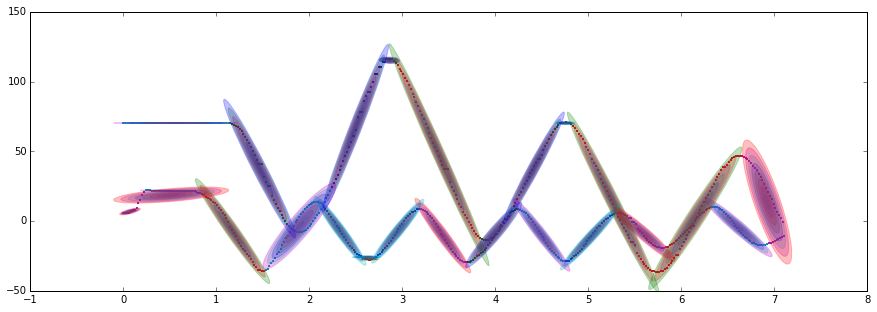

In [2]:
move_m1 = open('records/move_m1.record','r')
move_m2 = open('records/move_m2.record','r')

datas = SanitizeRecordsForGmm(1)

datas.add_move(move_m1)
datas.add_move(move_m2)

datas.plot_ellipses()
datas._X

(707, 2)
26 full


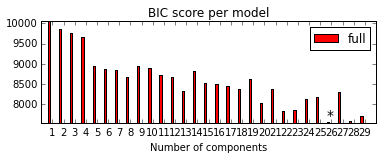

In [3]:
print datas._X.shape
datas.plot_bics()
print datas.gmm.n_components,datas.gmm.covariance_type


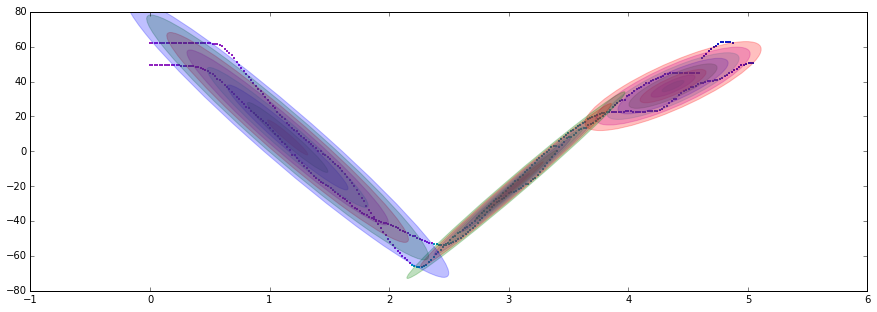

In [4]:
move_m1 = open('records/record_2_1.json','r')
move_m2 = open('records/record_2_2.json','r')

datas = SanitizeRecordsForGmm(1,n_components_range=range(3,4),cv_types=['spherical', 'tied', 'diag', 'full'])
# datas = Sanitize_records_for_gmm(1,cv_types=['spherical', 'tied', 'diag', 'full'])

datas.add_move(move_m1)
datas.add_move(move_m2)

datas.plot_ellipses()

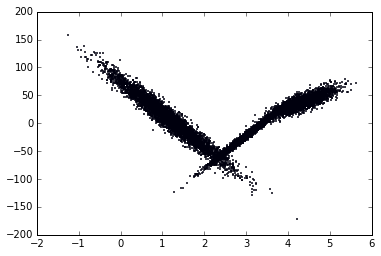

In [5]:
X = datas.gmm.sample(10000)
plt.scatter(X[:, 0], X[:, 1], .8)


In [6]:

def add_record(self, times, positions, speeds=None):
    # For simple tests only
    if speeds is not None:
        raise NotImplementedError
    if len(times) != len(positions):
        raise Exception("times and positions must have same dimensions")
    if self.dimension != 0:
        if len(positions[0]) != self.dimension:
            raise Exception("positions dimension exceded")
    # Dirty Sort
    X1 = [i for i in zip(times, positions)]
    X2 = [i for i in zip(self.times, self.positions)]
    X = sorted(X1 + X2)
    self.positions = []
    self.times = []
    for i in X:
        self.times.append(i[0])
        self.positions.append(i[1])
# def _gen_X(self):
#    self._XX = np.array([self.times,self.positions]).transpose()

def add_move(move_file):
    import json
    d = json.load(move_file)
    times = []
    positions = []
    speeds = []
    timed_positions = d['positions']
    for timestamp, mot_positions in timed_positions.items():
        motors_position = []
        motors_speed = []
        for motor, values in mot_positions.items():

            motors_position.append(float(values[0]))
            motors_speed.append(float(values[1]))
        times.append(float(timestamp))
        positions.append(motors_position)
        speeds.append(motors_speed)
    return (times,positions)
        

In [7]:
move_m1 = open('records/short.record','r')

a = add_move(move_m1)

In [8]:
import json

move_m1 = open('records/l_arm_4.record','r')
d = json.load(move_m1)
X = {}
timed_positions = d['positions']
for i, timestamp in enumerate(sorted(timed_positions.keys())):
    dic = timed_positions[timestamp]
    for motor, values in dic.items():
        #np.array([i],[float(values[0])])
        try:
            #X[motor] = np.hstack((X[motor],np.array([[i],[float(values[0])]])))

            X[motor] = np.vstack((X[motor],np.array([[i, float(values[0])]])))
        except KeyError:
            X[motor] = np.array([[i, float(values[0])]])
#                        X[motor] = np.array([[i],[float(values[0])]])

            

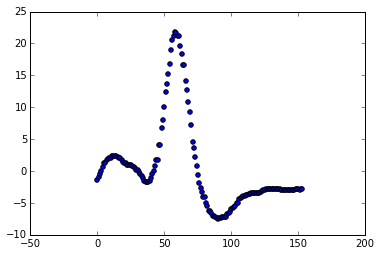

In [9]:
X['r_arm_z'].shape
plt.scatter(X['r_arm_z'][:,0],X['r_arm_z'][:,1])

In [24]:
manager = GmmManager()
manager.add_move('records/l_a_1.record')
print manager.datasets['r_arm_z'].shape
manager.add_move('records/l_a_3.record')
print manager.datasets['r_arm_z'].shape
manager.add_move('records/l_a_4.record')
print manager.datasets['r_arm_z'].shape
manager.datasets.keys()

(153, 2)
(306, 2)
(459, 2)


[u'r_arm_z', u'r_elbow_y', u'r_shoulder_x', u'r_shoulder_y']

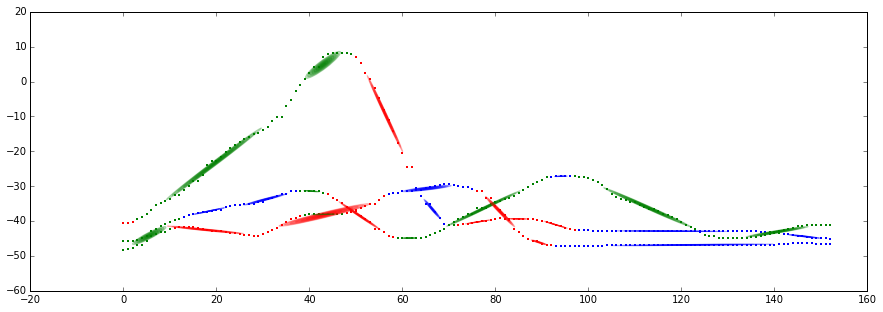

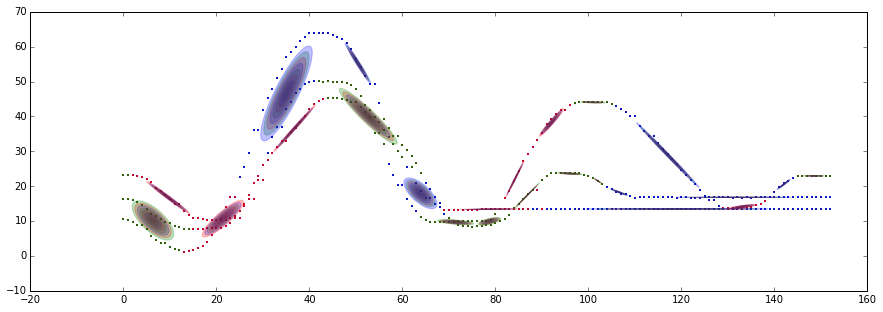

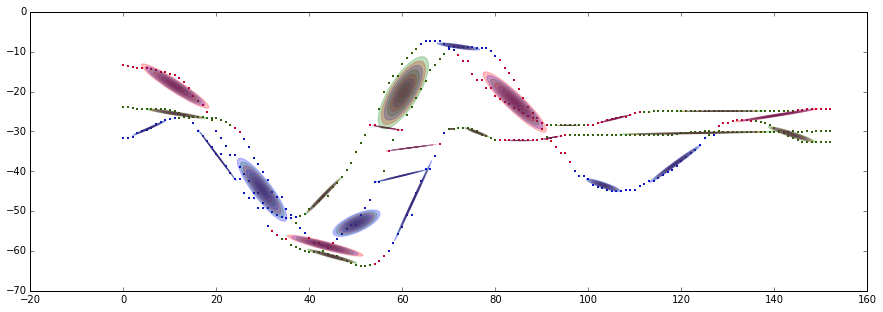

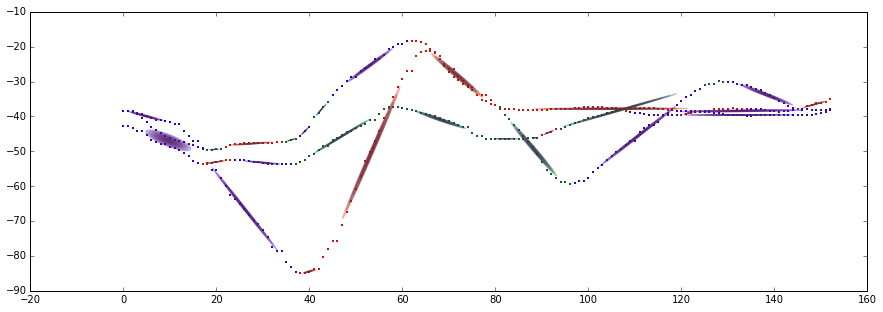

In [26]:
[manager.plot_ellipses_and_samples(key) for key in manager.datasets.keys()]

In [19]:
b.shape


(765, 2)